<div align="right">
  <img src="https://drive.google.com/uc?export=view&id=1J8JpP65HsHXdpJvhb_sMwn3yROyU832m" height="80" width="200" style="float: right;">
</div>
<h1><b>Data Science and Machine Learning</b></h1>
<h2><b>Clase 24</b>: K Vecinos más cercanos (KNN)</h2>
<h3><b>Docente</b>: <a href="https://www.linkedin.com/in/danielablanco/">Daniela Blanco</a>

# Contenido

- [1. K vecinos más cercanos (KNN)](#knn)
- [2. Métricas de distancia](#distancia)
- [3. Algoritmo](#algoritmo)
- [4. Hiperparámetros](#hiperparametros)
- [5. Uso no supervisado](#nosupervisado)
- [6. Ejemplo supervisado](#ejemplo_supervisado)
- [7. Ejemplo no supervisado](#ejemplo_nosupervisado)
- [8. Links de interés](#links)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.datasets import make_regression
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## 1. K vecinos más cercanos (KNN) <a name="knn"></a>

<img src="https://drive.google.com/uc?export=view&id=1FYHguUMcHpL33PcCnmSLQB5BHPCBAzvH" height="194" width="260" style="float: center;">

El modelo K vecinos más cercanos (K-nearest neighbors o KNN) se utiliza para problemas supervisados de clasificación y regresión.

Aunque suele ser más utilizado para clasificación.

Un nuevo dato se clasifica o se predice en función de la mayoría de las clases o valores de los K puntos de datos más cercanos en el espacio de características.

Se selecciona una métrica de distancia en particular para determinar los vecinos.

#### Ejemplos

- Clasificar el riesgo crediticio (moroso / no moroso) de una persona basado en individuos similares.

- Predecir cuánto dinero gasta un cliente potencial en nuestro negocio en base a los 5 clientes más similares a él y promediar sus gastos para hacer la predicción.

## 2. Métricas de distancia <a name="distancia"></a>

Las métricas de distancia son funciones utilizadas para medir la proximidad o similitud entre dos puntos de datos en un modelo KNN.

Existen una gran cantidad de propuestas, pero las más conocidas son las siguientes:

- **Euclidiana (Euclidean)**: Mide la distancia en línea recta entre dos puntos. Adecuada para datos numéricos.

- **Manhattan**: Mide la distancia como la diferencia de las coordenadas cartesianas de ambos puntos. Es adecuada para datos numéricos también.

- **Minkowski**: Es un punto intermedio entre las dos anteriores.

- **Chebyshev**: También conocida como la distancia máxima entre la diferencia de alturas (eje Y) o de anchuras (eje X).

- **Coseno (Cosine)**: Utilizada para medir la similitud entre dos vectores.

- **Hamming**: Se utiliza para datos categóricos o binarios. Mide la diferencia entre dos cadenas de caracteres de igual longitud.

<img src="https://drive.google.com/uc?export=view&id=1PGRDjWO-ifjRvizoHsZ6sTFKes0p6Ylp" height="352" width="480" style="float: center;">

## 3. Algoritmo <a name="algoritmo"></a>

El modelo se construye en función de unos pasos bien delimitados y definidos, que son los siguientes:

**1. Elegir k**: Se elige un valor para K, que representa el número de puntos de datos más cercanos que se considerarán para clasificar o predecir el nuevo punto de datos.

Un valor pequeño puede llevar a un modelo más ruidoso y sensible a valores atípicos (outliers), mientras que un valor elevado puede facilitar la toma de decisión.

**2. Medición de distancia**: Calcular la distancia entre el item a clasificar y el resto de items del dataset de entrenamiento.

**3. Identificación de los K vecinos más cercanos**: Se seleccionan los K puntos de datos más cercanos.

**4. Predicción**: Si se trata de un problema de clasificación, el nuevo punto se clasifica en la clase más frecuente entre los K vecinos más cercanos (votación por mayoría).

Si se trata de un problema de regresión, el valor objetivo para el nuevo punto se calcula como el promedio de los valores de los K vecinos más próximos.

El modelo no implica una fase de entrenamiento propiamente dicha, ya que todo el conjunto de entrenamiento se almacena en memoria para realizar las clasificaciones o predicciones en función de los vecinos más cercanos.

Es rendimiento de este modelo puede depender en gran medida del valor de K y de la elección de la métrica de distancia.

Además, puede ser computacionalmente costoso para grandes conjuntos de datos, ya que debe calcular la distancia con todos los puntos de entrenamiento para cada predicción.

<img src="https://drive.google.com/uc?export=view&id=1OO0JcDcC8-VRQ-BScwwmD7931ZV6igYv" height="263" width="427" style="float: center;">

<img src="https://drive.google.com/uc?export=view&id=1xksbciRUb7p1QjuR72hd27LPFhDVs9u9" height="263" width="426" style="float: center;">

### ¿Cómo elegir el valor de K?

Este número no se puede calcular a priori y se aproxima en la fase de optimización de hiperparámetros.

Como se puede visualizar en la figura anterior, su valor puede decantar una predicción concreta hacia la contraria o la contraria.

En general, se recomienda tener un número impar para k para evitar empates en la clasificación, y las tácticas de validación cruzada pueden ayudarlo a elegir el k óptimo para su conjunto de datos.

## 4. Hiperparámetros <a name="hiperparametros"></a>

Podemos construir un modelo KNN fácilmente en Python utilizando la librería `scikit-learn` y las funciones `KNeighborsClassifier` y `KNeighborsRegressor`.

Algunos de sus hiperparámetros son:

**n_neighbors**: Es el valor K. Define el número de vecinos que se considerarán para tomar decisiones de clasificación o regresión.
Es uno de los hiperparámetros más críticos en KNN.

  Valores pequeños de 𝑘: el modelo es más sensible a ruido en los datos.Tiende a sobreajustarse (overfitting).

  Valores grandes de 𝑘: se suavizan las predicciones porque considera más puntos. Tiende a subajustarse (underfitting).

**weights**: pesos de los vecinos. Determina si todos los vecinos contribuyen por igual o si los más cercanos tienen mayor peso.

**metric**: Especifica cómo se calcula la distancia entre los puntos.

**algorithm**: Determina el método usado para encontrar los vecinos más cercanos.

## 5. Uso no supervisado <a name="nosupervisado"></a>

Se puede usar la técnica de vecinos más cercanos para tareas no supervisadas.

Realiza cálculos de distancias basados únicamente en las características (features) de los datos.

Casos de usos más comunes:
- Detección de anomalías.
- Búsqueda de similitud entre datos.
- Sistemas de recomendación.

In [ ]:
# Datos de ejemplo
X = [[0, 0], [1, 1], [2, 2], [3, 3]]

# Inicializamos el modelo
nn = NearestNeighbors(n_neighbors=2)
nn.fit(X)

# Encontrar los vecinos más cercanos
distances, indices = nn.kneighbors([[1.5, 1.5]])

print(indices)  # Índices de los vecinos más cercanos
print(distances)  # Distancias a los vecinos más cercanos

## 6. Ejemplo supevisado <a name="ejemplo_supervisado"></a>

### Clasificación

In [2]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_iris.csv")

X = total_data.drop("specie", axis = 1)
y = total_data["specie"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,-1.506521,1.249201,-1.567576,-1.315444
15,-0.173674,3.090775,-1.283389,-1.052180
65,1.038005,0.098217,0.364896,0.264142
11,-1.264185,0.788808,-1.226552,-1.315444
42,-1.748856,0.328414,-1.397064,-1.315444


In [3]:
# targert
total_data["specie"] = total_data["specie"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

El gráfico 3D nos permite analizar la separación y distribución de las clases en función de las combinaciones de las 3 variables.

In [4]:
fig = px.scatter_3d(total_data, x = "petal width (cm)", y = "petal length (cm)", z = "sepal width (cm)", color = "specie", width = 1000, height = 500,
                    size = total_data["petal length (cm)"].abs(), color_discrete_sequence=["#E58139", "#39E581", "#8139E5"])
camera = dict(
    up = dict(x = 1, y = 3.5, z = 0),
    eye = dict(x = 2, y = 0, z = 0)
)

fig.update_layout(scene_camera = camera)
fig.show()

Para obtener más información, podríamos calcular un gráfico de dispersión para la relación entre las variables de dos en dos (esto debería hacerse en el análisis exploratorio de datos, EDA).

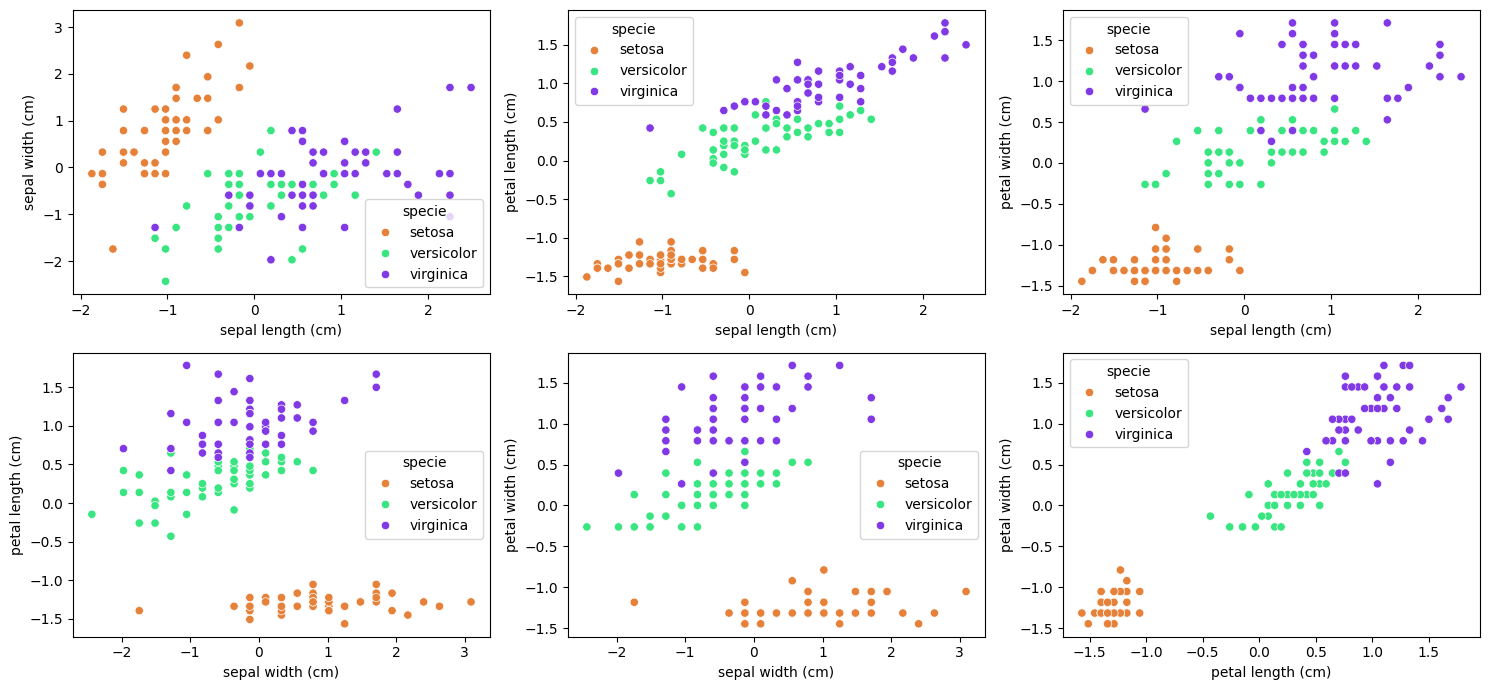

In [5]:
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

palette = ["#E58139", "#39E581", "#8139E5"]
sns.scatterplot(ax = axis[0, 0], data = total_data, x = "sepal length (cm)", y = "sepal width (cm)", hue = "specie", palette = palette)
sns.scatterplot(ax = axis[0, 1], data = total_data, x = "sepal length (cm)", y = "petal length (cm)", hue = "specie", palette = palette)
sns.scatterplot(ax = axis[0, 2], data = total_data, x = "sepal length (cm)", y = "petal width (cm)", hue = "specie", palette = palette)
sns.scatterplot(ax = axis[1, 0], data = total_data, x = "sepal width (cm)", y = "petal length (cm)", hue = "specie", palette = palette)
sns.scatterplot(ax = axis[1, 1], data = total_data, x = "sepal width (cm)", y = "petal width (cm)", hue = "specie", palette = palette)
sns.scatterplot(ax = axis[1, 2], data = total_data, x = "petal length (cm)", y = "petal width (cm)", hue = "specie", palette = palette)

plt.tight_layout()

plt.show()

Comparando los predictores uno por uno (para hacerlo más gráfico y explícito), se observa mejor la separación en función de los valores de las clases. Por lo tanto, el modelo KNN también es adecuado para resolver el problema.

In [6]:
# modelo
model = KNeighborsClassifier()

# entrenamiento
model.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
# predicion
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

y_pred_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [12]:
X_train.shape

(120, 4)

In [8]:
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Accuracy Test: ", accuracy_test)
print("Accuracy Train: ", accuracy_train)

Accuracy Test:  1.0
Accuracy Train:  0.9583333333333334


### ¿Si cambiamos K?

In [10]:
k_range = range(2, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)

    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

([<matplotlib.axis.XTick at 0x799f4a689590>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

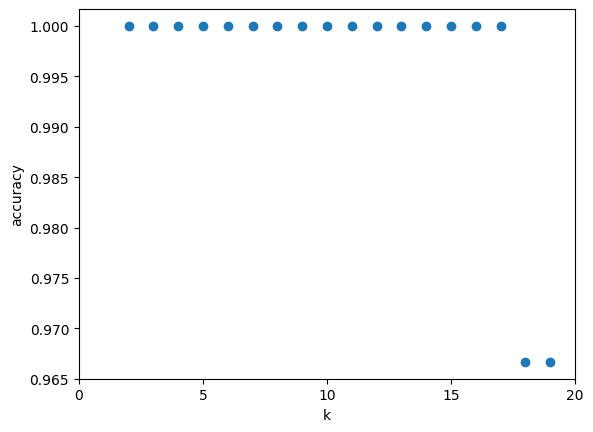

In [11]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')

plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

### Regresión

Para ejemplificar la implementación de un algoritmo KNN se generan datos al azar.

In [13]:
X, y = make_regression(n_samples = 1000, n_features = 4, noise = 1, random_state = 42)

X = pd.DataFrame(X, columns = ["Var1", "Var2", "Var3", "Var4"])

In [14]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Var1,Var2,Var3,Var4
29,-0.518270,0.357113,1.477894,-0.219672
535,0.457687,-2.120700,-0.606865,-2.238231
695,-0.224633,0.940771,-0.982487,-0.989628
557,0.360648,-0.320298,1.643378,-2.077812
836,-0.307962,-0.144519,-0.792420,-0.675178


In [15]:
total_data = X.copy()
total_data["target"] = y

fig = px.scatter_3d(total_data, x = "Var1", y = "Var2", z = "Var3", color = "target", width = 1000, height = 500,
                    size = total_data["Var4"].abs())
camera = dict(
    up = dict(x = 1, y = 3.5, z = 0),
    eye = dict(x = 2, y = 0, z = 0)
)

fig.update_layout(scene_camera = camera)
fig.show()

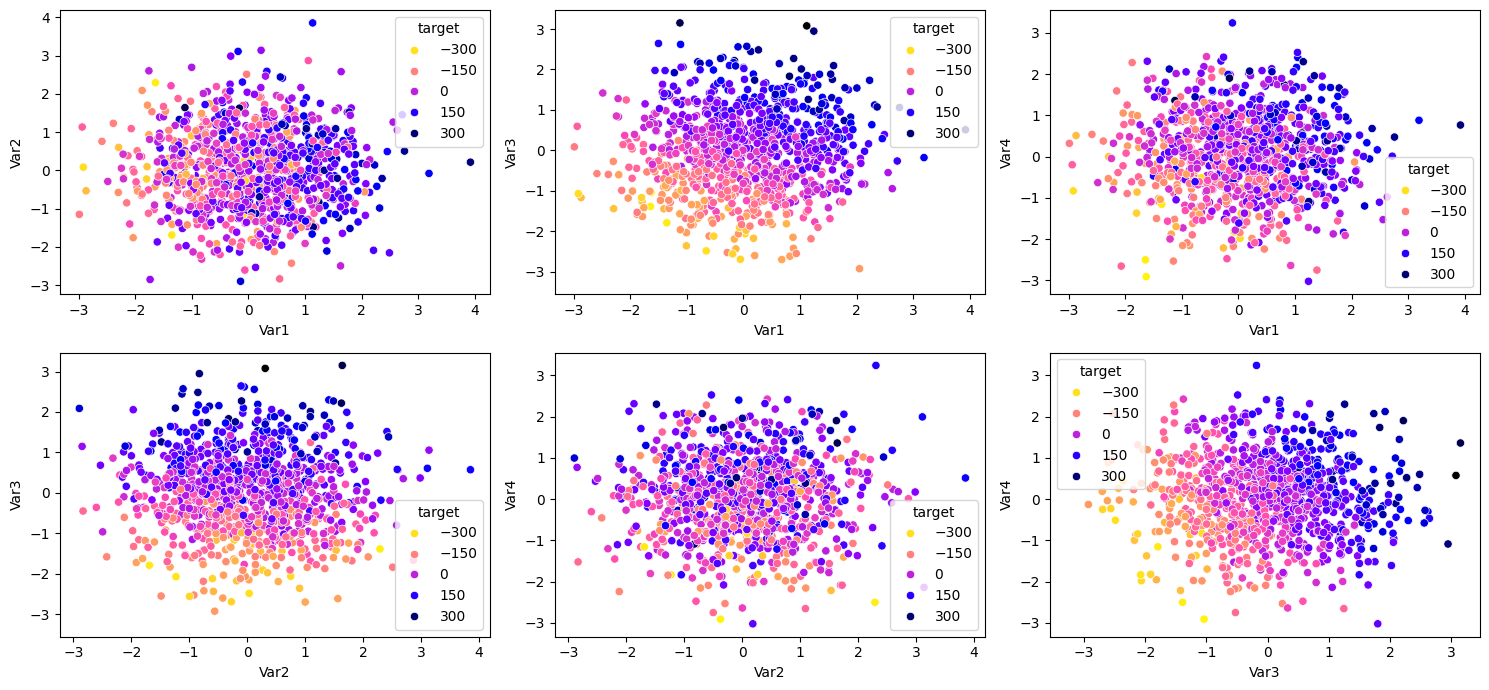

In [16]:
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

palette = sns.color_palette("gnuplot2_r", as_cmap=True)
sns.scatterplot(ax = axis[0, 0], data = total_data, x = "Var1", y = "Var2", hue = "target", palette = palette)
sns.scatterplot(ax = axis[0, 1], data = total_data, x = "Var1", y = "Var3", hue = "target", palette = palette)
sns.scatterplot(ax = axis[0, 2], data = total_data, x = "Var1", y = "Var4", hue = "target", palette = palette)
sns.scatterplot(ax = axis[1, 0], data = total_data, x = "Var2", y = "Var3", hue = "target", palette = palette)
sns.scatterplot(ax = axis[1, 1], data = total_data, x = "Var2", y = "Var4", hue = "target", palette = palette)
sns.scatterplot(ax = axis[1, 2], data = total_data, x = "Var3", y = "Var4", hue = "target", palette = palette)

plt.tight_layout()

plt.show()

In [17]:
# modelo
model = KNeighborsRegressor()

# entrenamiento
model.fit(X_train, y_train)

KNeighborsRegressor()

In [20]:
# prediccion
y_pred_test = model.predict(X_test)

y_pred_train = model.predict(X_train)

In [21]:
# metricas
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("==> Test")
print("MSE Test: ", mse_test)
print("RMSE Test: ", rmse_test)
print("R2 test: ", r2_test)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

print("==> Train")
print("MSE train: ", mse_train)
print("RMSE train: ", rmse_train)
print("R2 train: ", r2_train)

==> Test
MSE Test:  564.8367646867368
RMSE Test:  23.766294719344387
R2 test:  0.9547914514799766
==> Train
MSE train:  429.44806896885143
RMSE train:  20.723128841197013
R2 train:  0.9710600977517


## 7. Ejemplo no supervisado <a name="ejemplo_nosupervisado"></a>

In [22]:
# Cargar el conjunto de datos Wine
wine = load_wine()

# selección de atributos
X = wine.data  # Características (columnas)
y = wine.target  # Etiquetas (clases)

# Convertir a un DataFrame para una mejor visualización
df = pd.DataFrame(X, columns=wine.feature_names)
df['class'] = y

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [23]:
df['class'].value_counts()

,count
class,
1,71
0,59
2,48


In [28]:
# Crear el modelo NearestNeighbors
# n_neighbors: número de vecinos a buscar
# metric: métrica de distancia (por defecto 'minkowski' con p=2 -> distancia Euclidiana)
nbrs = NearestNeighbors(n_neighbors=10, metric='euclidean')

# entrenamiento
nbrs.fit(X)

NearestNeighbors(metric='euclidean', n_neighbors=10)

In [29]:
# Tomar un punto de prueba (por ejemplo, el quinto punto del dataset)
# Necesitamos reshape para que sea un array bidimensional
test_point = X[4].reshape(1, -1)
test_point

array([[1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [30]:
# Encontrar los vecinos más cercanos al punto de prueba
distances, indices = nbrs.kneighbors(test_point)

# Mostrar resultados
print("\nPunto de prueba:", test_point)
print("Índices de los vecinos más cercanos:", indices)
print("Distancias a los vecinos más cercanos:", distances)


Punto de prueba: [[1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
Índices de los vecinos más cercanos: [[  4  68 168 174 173  78 155  39 136 100]]
Distancias a los vecinos más cercanos: [[ 0.         17.72868015 20.77652521 22.42155882 24.14925879 24.39890366
  27.45302169 28.10955531 32.9042748  32.91059708]]


In [31]:
# Visualizar los vecinos más cercanos en el dataset
nearest_points = df.iloc[indices[0]]

nearest_points

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
68,13.34,0.94,2.36,17.0,110.0,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750.0,1
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,1
155,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
39,14.22,3.99,2.51,13.2,128.0,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760.0,0
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.0,2
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0,1


## 8. Links de interés <a name="links"></a>

- [Nearest Neighbors con Scikit-learn](https://scikit-learn.org/stable/modules/neighbors.html)
- [Clasificación K vecinos más próximos](https://www.datacamp.com/es/tutorial/k-nearest-neighbor-classification-scikit-learn)
- [Algoritmo KNN – cómo funciona y ejemplos en Python](https://www.themachinelearners.com/algoritmo-knn/)